In [1]:
import cv2
import numpy as np
import cairocffi as cairo
import io
import preproc
import detection
from detection.util import CHARTYPE
from chrecog.predict import get_session, load_ckpt, get_pred_one, get_candidate
sess = get_session()
load_ckpt(sess, "data/ckpt/161103_2ID.ckpt")
import reconst
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'

ckpt loaded from data/ckpt/161103_2ID.ckpt


In [2]:
def write_line(text, font="NanumGothic"):
    WIDTH, HEIGHT = 540, 100
    surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
    ctx = cairo.Context (surface)
    ctx.set_font_size(40)
    ctx.set_source_rgb(0, 0, 0)
    ctx.paint()
    ctx.set_source_rgb(1, 1, 1)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
                cairo.FONT_WEIGHT_NORMAL)
    ctx.move_to(20,40)
    ctx.show_text(text)
    fb = io.BytesIO()
    surface.write_to_png(fb)
    fb.seek(0)
    blob = fb.read()
    blob_array = np.asarray(bytearray(blob), dtype=np.uint8)
    mat = cv2.imdecode(blob_array, 0)
    fb.close()
    return mat

In [12]:
def test_line(text, font="NanumGothic"):
    img = write_line(text, font)
    plt.figure()
    plt.imshow(img)

    processed = preproc.process(img)
    graphs = detection.get_graphs(processed)

    i=0
    for p in graphs:
        for l in p.lines:
            for c in l.chars:
                if c.type == CHARTYPE.BLANK:
                    c.value = " "
                    continue
                if i % 10 == 0:
                    plt.figure()
                plt.subplot(1,10,i%10+1)
                plt.xticks(())
                plt.yticks(())
                plt.imshow(c.img)
                i += 1
                c.pred = get_pred_one(c.img / 255)
                c.value = get_candidate(c.pred)

    print(reconst.build_graphs(graphs), end="")
    
def test_img(path):
    img = cv2.imread(path)
    plt.figure()
    plt.imshow(img)

    processed = preproc.process(img)
    graphs = detection.get_graphs(processed)

    i=0
    j=0
    for p in graphs:
        for l in p.lines:
            plt.figure()
            plt.xticks(())
            plt.yticks(())
            plt.imshow(l.img)
            for c in l.chars:
                print(c.pt)
                if c.type == CHARTYPE.BLANK:
                    c.value = " "
                    continue
                assert c.type == CHARTYPE.CHAR
                #c.pred = get_pred_one(c.img / 255)
                #c.value = get_candidate(c.pred)

    #print(reconst.build_graphs(graphs))

(9, 32)
(33, 55)
(65, 85)
(88, 110)
(112, 133)
(135, 158)
(168, 188)
(191, 220)
(230, 253)
(254, 282)
(292, 315)
(324, 347)
(347, 371)
(372, 394)
(404, 425)
(427, 447)
(451, 474)
(475, 495)
(499, 522)
(530, 553)
(554, 577)
(577, 601)
(601, 623)
(625, 646)
(656, 679)
(680, 703)
(704, 724)
(728, 750)
(759, 782)
(783, 803)
(806, 829)
(831, 854)
(855, 859)
(870, 891)
(900, 923)
(933, 955)
(956, 980)
(989, 1009)
(1012, 1032)
(1043, 1065)
(1067, 1088)
(1098, 1120)
(1121, 1144)
(1154, 1174)
(1178, 1200)
(10, 30)
(40, 63)
(64, 88)
(96, 117)
(119, 142)
(144, 164)
(175, 196)
(199, 219)
(222, 251)
(261, 284)
(286, 306)
(317, 338)
(341, 362)
(364, 386)
(387, 410)
(420, 442)
(444, 464)
(475, 497)
(498, 520)
(522, 545)
(553, 576)
(578, 598)
(601, 622)
(624, 647)
(648, 671)
(680, 703)
(704, 725)
(728, 751)
(752, 772)
(775, 798)
(807, 830)
(830, 852)
(854, 877)
(886, 908)
(917, 940)
(940, 963)
(973, 994)
(996, 1017)
(1019, 1042)
(1045, 1065)
(1068, 1090)
(1099, 1102)
(1103, 1107)
(1109, 1130)
(1133, 1

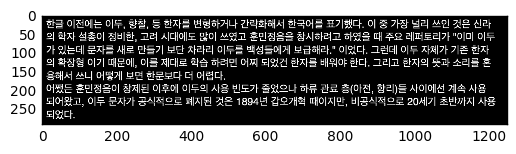

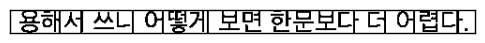

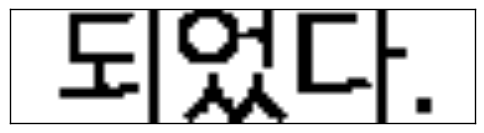

In [13]:
test_img("detection/test/line_testing/test2.png")
#test_line("오. 왜 그러세요...")
#test_line("컴퓨터공학과입니다.")